## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def expon(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [2]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data
star1=star_hdus[1].data
star2=star_hdus[1].data
star3=star_hdus[1].data
star4=star_hdus[1].data
star5=star_hdus[1].data
star6=star_hdus[1].data
star7=star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

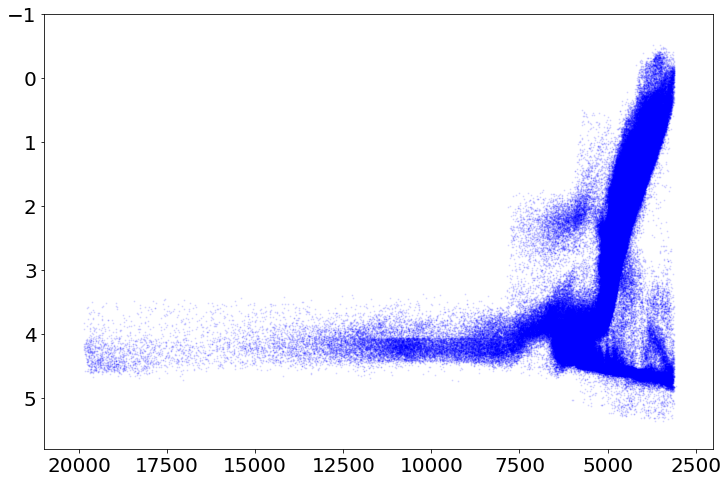

In [3]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

In [ ]:


#mid_stars=mid_stars(-nan_mask)

#feh=mid_stars['FE_O']
#ofe=mid_stars['O_FE']
#feh_err= mid_stars['FE_H_ERR']
#ofe_err= mid_stars['O_FE_ERR']

#theta=(0,1,-1,0.5)
#dumb_x=np.arrange(np.min(feh),np.max(feh),0.02)
#plt.scatter(feh,ofc,s=2)
#plt.plot(dumb_x,sigmoid(dumb_x,*theta),c='k',linewidth=2)

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.030, 0.019
POLY3: -0.042, -0.084, 0.007, 0.021
SIGMOID: -0.871, 25.265, 0.070, -0.055


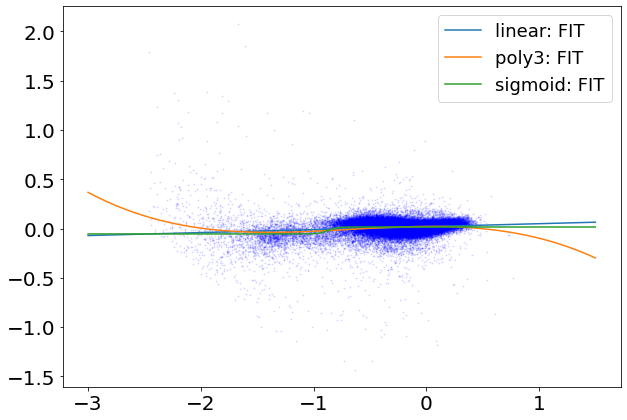

In [4]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star1=star1[~np.isnan(star1['FE_H'])]
star1=star1[~np.isnan(star1['NI_FE'])]
star1=star1[~np.isnan(star1['FE_H_ERR'])]
star1=star1[~np.isnan(star1['NI_FE_ERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −10 < GLAT < 10 )
ct1 = (np.bitwise_and(star1['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star1['starflag'], suspectbits) == 0) &\
     (star1['GLAT'] > 60) 
cut1 = np.where(ct1)[0]


## LINEAR FIT (2 parameter)
slope1, intercept1 = mcFit2(linear, star1['FE_H'][cut1], star1['NI_FE'][cut1], star1['FE_H_ERR'][cut1]/1000, \
                          star1['NI_FE_ERR'][cut1]/1000, p0=[0,0])
print(f'LINEAR: {slope1:.3f}, {intercept1:.3f}')

## POLY3 FIT (4 parameter)
polyA1, polyB1, polyC1, polyD1 = mcFit4(poly3, star1['FE_H'][cut1], star1['NI_FE'][cut1], star1['FE_H_ERR'][cut1]/1000, \
                         star1['NI_FE_ERR'][cut1]/1000,p0=[600,1,1,1])
#I need to modify p0 for poly 3 fit. it is off from what's expected. Play with numbers more
print(f'POLY3: {polyA1:.3f}, {polyB1:.3f}, {polyC1:.3f}, {polyD1:.3f}')

## Sigmoid FIT (4 parameter)
cfA1, cfB1, cfC1, cfD1 = mcFit4(sigmoid, star1['FE_H'][cut1], star1['NI_FE'][cut1], star1['FE_H_ERR'][cut1]/1000, \
                            star1['NI_FE_ERR'][cut1]/1000,p0=[0,1,-1,0.5])
print(f'SIGMOID: {cfA1:.3f}, {cfB1:.3f}, {cfC1:.3f}, {cfD1:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star1['FE_H'][cut1],star1['NI_FE'][cut1],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['RA'][cut1]),star['DEC'][cut1], xerr=(star['RA'][cut1]/1000),
#             yerr=(star['DEC'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope1, intercept1), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA1, polyB1, polyC1, polyD1 ), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,sigmoid(x_plot, cfA1, cfB1, cfC1, cfD1), label='sigmoid: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only with with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

(array([], dtype=int64),) (array([], dtype=int64),)
LINEAR: -0.000, 1.638
POLY2: 0.000, -0.001, 2.683


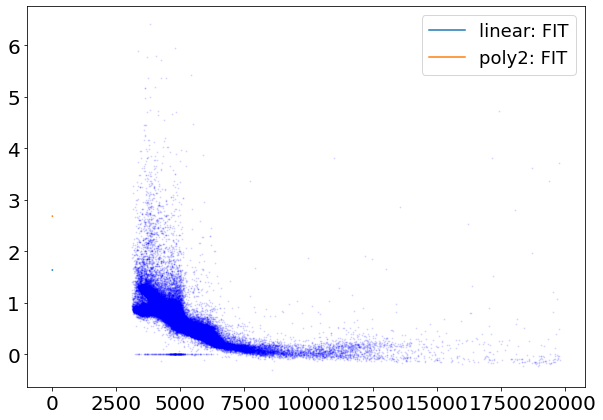

In [5]:
# write you fitting code and plot the results here

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star2=star2[~np.isnan(star2['TEFF'])]
star2=star2[~np.isnan(star2['J'])]
star2=star2[~np.isnan(star2['K'])]
star2=star2[~np.isnan(star2['J_ERR'])]
star2=star2[~np.isnan(star2['K_ERR'])]
#star=star[~np.isnan(star['J']-star['K'])]
#star=star[~np.isnan(star['TEFF_ERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −10 < GLAT < 10 )
ct2 = (np.bitwise_and(star2['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star2['starflag'], suspectbits) == 0) &\
     (star2['GLAT'] < -10) 
cut2 = np.where(ct2)[0]



## LINEAR FIT (2 parameter)
slope2, intercept2 = mcFit2(linear, star2['TEFF'][cut2], (star2['J']-star2['K'])[cut2], star2['TEFF_ERR'][cut2]/1000, \
                          (np.sqrt((star2['J_ERR']**2)+star2['K_ERR']**2))[cut2]/1000, p0=[0,0])
print(f'LINEAR: {slope2:.3f}, {intercept2:.3f}')

## POLY2 FIT (3 parameter)
polyA2, polyB2, polyC2,  = mcFit3(poly2, star2['TEFF'][cut2], (star2['J']-star2['K'])[cut2], star2['TEFF_ERR'][cut2]/1000, \
                         (np.sqrt((star2['J_ERR']**2)+star2['K_ERR']**2))[cut2]/1000,p0=[600,1,1])
print(f'POLY2: {polyA2:.3f}, {polyB2:.3f}, {polyC2:.3f}')

## Log FIT (4 parameter)
#cfA2, cfB2, cfC2, cfD2 = mcFit4(logfit, star2['TEFF'][cut2], (star2['J']-star2['K'])[cut2], star2['TEFF_ERR'][cut2]/1000, \
 #                           (np.sqrt(star2['J_ERR']**2+star2['K_ERR']**2))[cut2]/1000,p0=[0.125,0.75,0.75,1.05])
#print(f'LOGFIT: {cfA2:.3f}, {cfB2:.3f}, {cfC2:.3f}, {cfD2:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star2['TEFF'][cut2],(star2['J']-star2['K'])[cut2],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['RA'][cut1]),star['DEC'][cut1], xerr=(star['RA'][cut1]/1000),
#             yerr=(star['DEC'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope2, intercept2), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA2, polyB2, polyC2, ), label='poly2: FIT')
#cosfit
#ax1.plot(x_plot,logfit(x_plot, cfA2, cfB2, cfC2, cfD2), label='cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

In [ ]:
""""mid_stars=mid_stars(-nan_mask)
ofe=mid_stars['O_FE']
feh_err= mid_stars['FE_H_ERR']
ofe_err= mid_stars['O_FE_ERR']

theta=(0,1,-1,0.5)
umb_x=np.arrange(np.min(feh),np.max(feh),0.02)
plt.scatter(feh,ofc,s=2)
plt.plot(dumb_x,sigmoid(dumb_x,*theta),c='k',linewidth=2) 

teff=star['TEFF']
jk=star['J']-star['K']"""

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.001, -3.966
POLY3: -0.000, 0.014, -1.781, 27.969
COSFIT: 49.826, 0.023, 0.863, 0.585


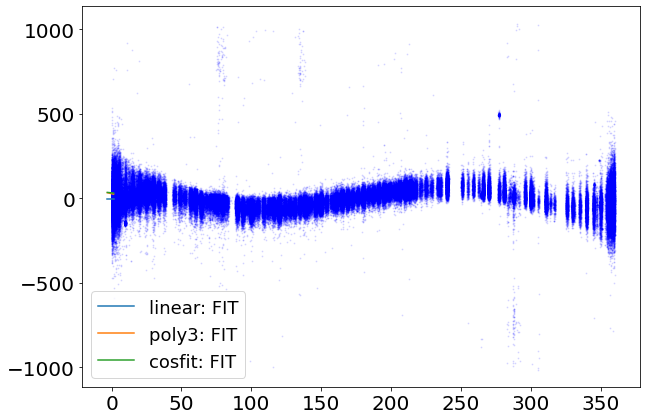

In [20]:
# write you fitting code and plot the results here

badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star3=star3[~np.isnan(star3['GLON'])]
star3=star3[~np.isnan(star3['VHELIO_AVG'])]
star3=star3[~np.isnan(star3['VERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −10 < GLAT < 10 )
ct3 = (np.bitwise_and(star3['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star3['starflag'], suspectbits) == 0) &\
     ((-10<star3['GLAT']) & (10>star3['GLAT']))
cut3 = np.where(ct3)[0]


## LINEAR FIT (2 parameter)
slope3, intercept3 = mcFit2(linear, star3['GLON'][cut3], star3['VHELIO_AVG'][cut3], star3['GLON'][cut3]/1000, \
                         star3['VERR'][cut3]/1000, p0=[0,0])
print(f'LINEAR: {slope3:.3f}, {intercept3:.3f}')

## POLY3 FIT (4 parameter) # modify needs 4 paramenters in p0
polyA3, polyB3, polyC3, polyD3,  = mcFit4(poly3, star3['GLON'][cut3], star3['VHELIO_AVG'][cut3], star3['GLON'][cut3]/1000, \
                         star3['VERR'][cut3]/1000,p0=[600,1,1,1])
print(f'POLY3: {polyA3:.3f}, {polyB3:.3f}, {polyC3:.3f}, {polyD3:.3f}')

## COS FIT (4 parameter)
cfA3, cfB3, cfC3, cfD3 = mcFit4(cosfit, star3['GLON'][cut3], star3['VHELIO_AVG'][cut3], star3['GLON'][cut3]/1000, \
                            0.000001,p0=[60,0.02,0,0])
print(f'COSFIT: {cfA3:.3f}, {cfB3:.3f}, {cfC3:.3f}, {cfD3:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star3['GLON'][cut3],star3['VHELIO_AVG'][cut3],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['RA'][cut1]),star['DEC'][cut1], xerr=(star['RA'][cut1]/1000),
#             yerr=(star['DEC'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope3, intercept3), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA3, polyB3, polyC3,polyD3 ), label='poly3: FIT')
#cosfit
ax1.plot(x_plot,cosfit(x_plot, cfA3, cfB3, cfC3, cfD3), label='cosfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISTIS vs.  VSCATTER (VERR)__ For NVISTIS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [29]:
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star4=star4[~np.isnan(star4['NVISTIS'])]
star4=star4[~np.isnan(star4['VSCATTER'])]
star4=star4[~np.isnan(star4['VERR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −10 < GLAT < 10 )
ct4 = (np.bitwise_and(star4['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star4['starflag'], suspectbits) == 0) &\
     (star4['NVISTIS'] >= 1) 
cut4 = np.where(ct4)[0]


## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star4['NVISTIS'][cut4], star4['VSCATTER'][cut4],star4['NVISTIS'][cut4]/1000, \
                          star4['VERR'][cut4]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## EXPONENTIAL FIT (4 parameter)  #needs to be in optical range not good enough at the moment
polyA, polyB, polyC  = mcFit4(expon, star4['NVISTIS'][cut4], star4['VSCATTER'][cut4], star4['NVISTIS'][cut4]/1000, \
                         star4['VERR'][cut4]/1000,p0=[600,1,1,1])
print(f'EXPON: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## Log FIT (4 parameter)          #needs to be in optical range not good enough at the moment
cfA, cfB, cfC, cfD = mcFit4(logfit, star4['NVISTIS'][cut4], star4['VSCATTER'][cut4], star4['NVISTIS'][cut4]/1000,\
                            star4['VERR'][cut4]/1000,p0=[60,0.02,0,0])
print(f'LOGFIT: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star4['NVISTIS'][cut4],(star4['VSCATTER'])[cut4],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['RA'][cut1]),star['DEC'][cut1], xerr=(star['RA'][cut1]/1000),
#             yerr=(star['DEC'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,expon(x_plot, polyA, polyB, polyC, ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,logfit(x_plot, cfA, cfB, cfC, cfD), label='logfit: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR: 0.107, 0.453


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

[2.4031500e-05 3.0258799e-04 8.7293101e-06 ... 1.3314700e-05 8.5933301e-05
 2.2355202e-05]
LINEAR: -0.019, 0.602
POLY2: 0.001, -0.275, 16.746
POLY3: 0.000, -0.000, -0.169, 13.115


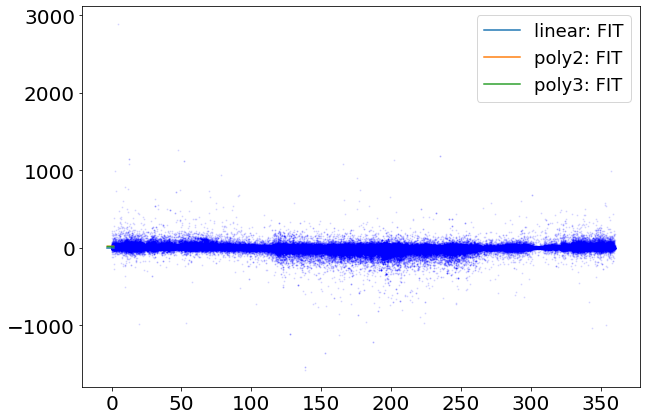

In [36]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star5=star5[~np.isnan(star5['RA'])]
star5=star5[~np.isnan(star5['GAIA_PMRA'])]
star5=star5[~np.isnan(star5['GAIA_PMRA_ERROR'])]

# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −10 < GLAT < 10 )
ct5 = (np.bitwise_and(star5['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star5['starflag'], suspectbits) == 0) 
      
cut5 = np.where(ct5)[0]

## LINEAR FIT (2 parameter)
slope, intercept = mcFit2(linear, star5['RA'][cut5], (star5['GAIA_PMRA'])[cut5], star5['RA'][cut5]/1000, \
                          star5['GAIA_PMRA_ERROR'][cut5]/1000, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')

## poly 2 (3 param)
polyA, polyB, polyC  = mcFit3(poly2, star5['RA'][cut5], (star5['GAIA_PMRA'])[cut5], star5['RA'][cut5]/1000, \
                         star5['GAIA_PMRA_ERROR'][cut5]/1000,p0=[600,1,1])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')

## poly 3 (4 param)
cfA, cfB, cfC, cfD = mcFit4(poly3, star5['RA'][cut5], (star5['GAIA_PMRA'])[cut5], star5['RA'][cut5]/1000,\
                            star5['GAIA_PMRA_ERROR'][cut5]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star5['RA'][cut5],(star5['GAIA_PMRA'])[cut5],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['RA'][cut1]),star['DEC'][cut1], xerr=(star['RA'][cut1]/1000),
#             yerr=(star['DEC'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star6=star6[~np.isnan(star6['TEFF'])]
star6=star6[~np.isnan(star6['LOGG'])]
star6=star6[~np.isnan(star6['TEFF_ERR'])]
star6=star6[~np.isnan(star6['LOGG_ERR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −10 < GLAT < 10 )
ct6 = (np.bitwise_and(star6['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star6['starflag'], suspectbits) == 0) &\
     (star6['TEFF'] > 60000 & star6['LOGG']<3) 
cut6 = np.where(ct6)[0]


## LINEAR FIT (2 parameter)
slope1, intercept1 = mcFit2(linear, star6['TEFF'][cut6], star6['LOGG'][cut6], star6['TEFF_ERR'][cut6]/1000, \
                          star6['LOGG_ERR'][cut6]/1000, p0=[0,0])
print(f'LINEAR: {slope1:.3f}, {intercept1:.3f}')

## POLY2 FIT (3 parameter)
polyA1, polyB1, polyC1, polyD1 = mcFit4(poly2, star6['TEFF'][cut6], star6['LOGG'][cut6], star6['TEFF_ERR'][cut6]/1000, \
                         star6['LOGG_ERR'][cut6]/1000,p0=[600,1,1,1])
#I need to modify p0 for poly 3 fit. it is off from what's expected. Play with numbers more
print(f'POLY2: {polyA1:.3f}, {polyB1:.3f}, {polyC1:.3f}')

## POLY3 FIT (4 parameter)
cfA1, cfB1, cfC1, cfD1 = mcFit4(poly3, star6['TEFF'][cut6], star6['LOGG'][cut6], star6['TEFF_ERR'][cut6]/1000, \
                            star6['LOGG_ERR'][cut6]/1000,p0=[0,1,-1,0.5])
print(f'POLY3: {cfA1:.3f}, {cfB1:.3f}, {cfC1:.3f}, {cfD1:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star6['TEFF'][cut6],star6['LOGG'][cut6],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['RA'][cut1]),star['DEC'][cut1], xerr=(star['RA'][cut1]/1000),
#             yerr=(star['DEC'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope1, intercept1), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly3(x_plot, polyA1, polyB1, polyC1 ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,sigmoid(x_plot, cfA1, cfB1, cfC1, cfD1), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.985, -0.971
POLY2: 0.002, -1.101, -0.781
POLY3: -0.000, 0.009, -1.243, -0.598


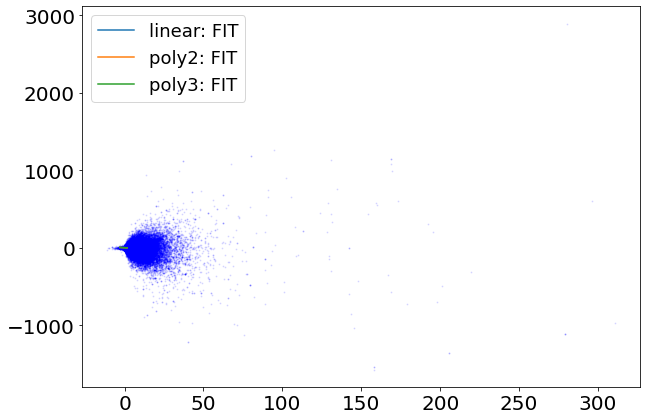

In [49]:
# write you fitting code and plot the results here
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

star7=star7[~np.isnan(star7['GAIA_PARALLAX'])]
star7=star7[~np.isnan(star7['GAIA_PARALLAX_ERROR'])]
star7=star7[~np.isnan(star7['GAIA_PMRA'])]
star7=star7[~np.isnan(star7['GAIA_PMRA_ERROR'])]
# Make a Boolena Mask to remove bad data - AND ANY OTHER NEEDE CUTS (e.g., −10 < GLAT < 10 )
ct7 = (np.bitwise_and(star7['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star7['starflag'], suspectbits) == 0) 
      
cut7 = np.where(ct7)[0]


## LINEAR FIT (2 parameter)
slope1, intercept1 = mcFit2(linear, star7['GAIA_PARALLAX'][cut7], star7['GAIA_PMRA'][cut7],  \
                          star7['GAIA_PMRA_ERROR'][cut7]/1000, p0=[0,0])
print(f'LINEAR: {slope1:.3f}, {intercept1:.3f}')

## POLY2 FIT (3 parameter)
polyA1, polyB1, polyC1,  = mcFit3(poly2, star7['GAIA_PARALLAX'][cut7], star7['GAIA_PMRA'][cut7], star7['GAIA_PARALLAX_ERROR'][cut7]/1000,  \
                         star7['GAIA_PMRA_ERROR'][cut7]/1000,p0=[600,1,1])
#I need to modify p0 for poly 3 fit. it is off from what's expected. Play with numbers more
print(f'POLY2: {polyA1:.3f}, {polyB1:.3f}, {polyC1:.3f}')
## POLY3 FIT (4 parameter)
cfA1, cfB1, cfC1, cfD1 = mcFit4(poly3, star7['GAIA_PARALLAX'][cut7], star7['GAIA_PMRA'][cut7], star7['GAIA_PARALLAX_ERROR'][cut7]/1000, \
                            star7['GAIA_PMRA_ERROR'][cut7]/1000,p0=[0,1,-1,0.5])
print(f'POLY3: {cfA1:.3f}, {cfB1:.3f}, {cfC1:.3f}, {cfD1:.3f}')


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

# PLOT DATA AND ERROR BARS
ax1.scatter(star7['GAIA_PARALLAX'][cut7],star7['GAIA_PMRA'][cut7],s=1,c='b',alpha=0.1)
#ax1.errorbar((star['RA'][cut1]),star['DEC'][cut1], xerr=(star['RA'][cut1]/1000),
#             yerr=(star['DEC'][cut1]/1000), ecolor='grey',fmt='none', capsize=5, zorder=0)


# PLOT DATA FITS FROM ABOVE
x_plot = np.linspace(-3,1.5,100) # X-PLOTING FOR FITS
#linear fit
ax1.plot(x_plot,linear(x_plot, slope1, intercept1), label='linear: FIT')
#poly2 fit
ax1.plot(x_plot,poly2(x_plot, polyA1, polyB1, polyC1 ), label='poly2: FIT')
#cosfit
ax1.plot(x_plot,poly3(x_plot, cfA1, cfB1, cfC1, cfD1), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()